In [1]:
import numpy as  np

from digits.models import Generator, Discriminator, GAN
from digits.data import load_data, preprocessing
from digits.plot import plot_generated_images

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Load the TensorBoard notebook extension
%load_ext tensorboard
import tensorflow as tf
import datetime, os

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


2022-08-24 17:59:05.943595: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-24 17:59:05.943625: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
PATH_TO_DATA = '../data'

data = load_data("../data/train.csv")

In [3]:
gan = GAN(generator=Generator(), discriminator = Discriminator())

2022-08-24 17:59:13.525405: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-24 17:59:13.525708: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-24 17:59:13.525742: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ryxx): /proc/driver/nvidia/version does not exist
2022-08-24 17:59:13.526136: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
from keras.callbacks import TensorBoard
import keras

# %tensorboard --logdir tf_logs

# Create the TensorBoard callback,
# which we will drive manually
tensorboard = keras.callbacks.TensorBoard(
  log_dir='tf_logs',
  histogram_freq=0,
  write_graph=True,
  write_grads=True
)
tensorboard.set_model(gan)


def training(gan, data, epochs=1, batch_size=128):
    
    (X_train, y_train, X_test, y_test) = data

    for epoch_id in range(1,epochs+1 ):
        for batch_id in range(batch_size):
            image_batch = X_train[np.random.randint(low=0, high=X_train.shape[0], size=batch_size)]
            logs = gan.train_gan_on_batch(image_batch)
        tensorboard.on_epoch_end(epoch_id, logs)

    tensorboard.on_train_end(None)
        # if e == 1 or e % 20 == 0:
           
        #     plot_generated_images(gan.generator)


training(gan, data, 10, 128)

4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 3ms/step


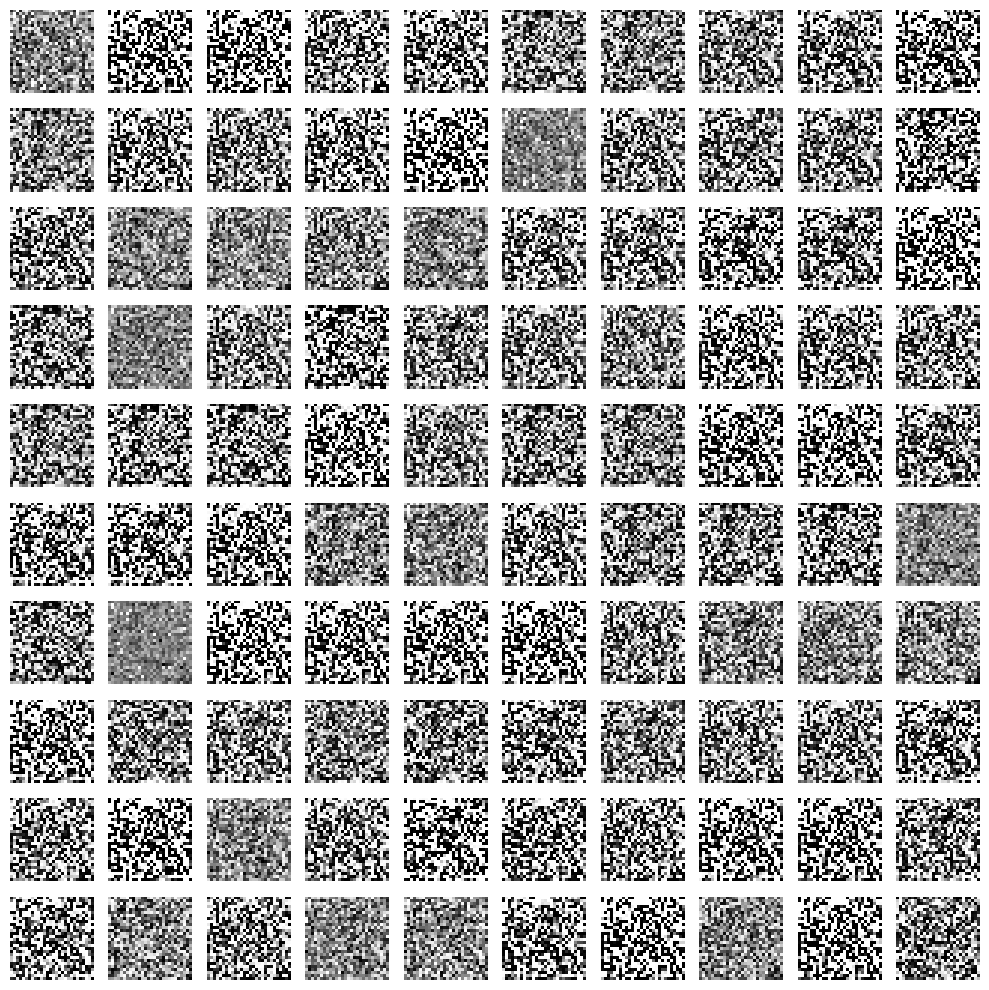

In [6]:
plot_generated_images(gan.generator)